## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [30]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from sklearn.metrics import classification_report

In [32]:
# Importing all datasets
churn_data = pd.read_csv("/content/churn_data (1).csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
customer_data = pd.read_csv("/content/customer_data (1).csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [34]:
internet_data = pd.read_csv("/content/internet_data (1).csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [35]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [36]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [37]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [38]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [39]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [40]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [41]:
telecom['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [42]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [43]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [44]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# # Creating dummy variables for the remaining categorical variables and dropping the level with big names.

def binary_dummies(x):
    return x.map({True: 1, False : 0})

telecom['gender'].replace([0,1],['Female','Male'],inplace=True)


# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis =  1)
ml1 = ml1.apply(binary_dummies)
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis =  1)
os1 = os1.apply(binary_dummies)
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis =  1)
ob1 = ob1.apply(binary_dummies)
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis =  1)
dp1 = dp1.apply(binary_dummies)
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis =  1)
ts1 = ts1.apply(binary_dummies)
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis =  1)
st1 = st1.apply(binary_dummies)
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis =  1)
sm1 = sm1.apply(binary_dummies)
telecom = pd.concat([telecom,sm1], axis=1)




cm = pd.get_dummies(telecom['Contract'], prefix='Contract')
cm1 = cm.drop(['Contract_Month-to-month'], axis =  1)
cm1 = cm1.apply(binary_dummies)
telecom = pd.concat([telecom,cm1], axis=1)

pm = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod')
pm1 = pm.drop(['PaymentMethod_Bank transfer (automatic)'], axis =  1)
pm1 = pm1.apply(binary_dummies)
telecom = pd.concat([telecom,pm1], axis=1)

im = pd.get_dummies(telecom['InternetService'], prefix='InternetService')
im1 = im.drop(['InternetService_No'], axis =  1)
im1 = im1.apply(binary_dummies)
telecom = pd.concat([telecom,im1], axis=1)


In [45]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,0,1,0,0,0,1,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,0,0,0,0,1,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,1,0,0,0,0,1,0,0,1


#### Dropping the repeated variables

In [46]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','customerID','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges','InternetService_Fiber optic'], axis = 1)

In [47]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   SeniorCitizen                          7043 non-null   int64  
 6   Partner                                7043 non-null   int64  
 7   Dependents                             7043 non-null   int64  
 8   MultipleLines_No                       7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  OnlineSecurity_No                      7043 non-null   int64  
 11  Onli

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [48]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen']]

In [49]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000
99%,72.000000,114.729000,1.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [50]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProtection_No                      0
DeviceProtection_Yes                     0
TechSupport_No                           0
TechSupport_Yes                          0
StreamingTV_No                           0
StreamingTV_Yes                          0
StreamingMovies_No                       0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Tw

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [51]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBackup_Yes                         0.0
DeviceProtection_No                      0.0
DeviceProtection_Yes                     0.0
TechSupport_No                           0.0
TechSupport_Yes                          0.0
StreamingTV_No                           0.0
StreamingTV_Yes                          0.0
StreamingMovies_No                       0.0
StreamingMovies_Yes                      0.0
Contract_O

In [52]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBackup_Yes                         0.0
DeviceProtection_No                      0.0
DeviceProtection_Yes                     0.0
TechSupport_No                           0.0
TechSupport_Yes                          0.0
StreamingTV_No                           0.0
StreamingTV_Yes                          0.0
StreamingMovies_No                       0.0
StreamingMovies_Yes                      0.0
Contract_O

Now we don't have any missing values

### Step 4: Test-Train Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable to X
X = telecom.drop(['Churn'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL
0,1,0,1,29.85,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
1,34,1,0,56.95,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
2,2,1,1,53.85,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
3,45,0,0,42.30,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,2,1,1,70.70,0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0


In [55]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=100 , stratify= y)

### Step 5: Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL
2498,-0.215852,1,1,-0.353512,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,1
1102,-1.193968,1,1,-0.275255,0,1,1,1,0,1,...,1,0,1,0,0,0,0,0,1,1
2409,-0.175097,0,1,-0.147046,0,1,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
6917,1.618115,1,1,0.653842,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
3845,-1.153213,1,1,0.315837,0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0


We have almost 27% churn rate

### Step 6: Looking at Correlations

In [59]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

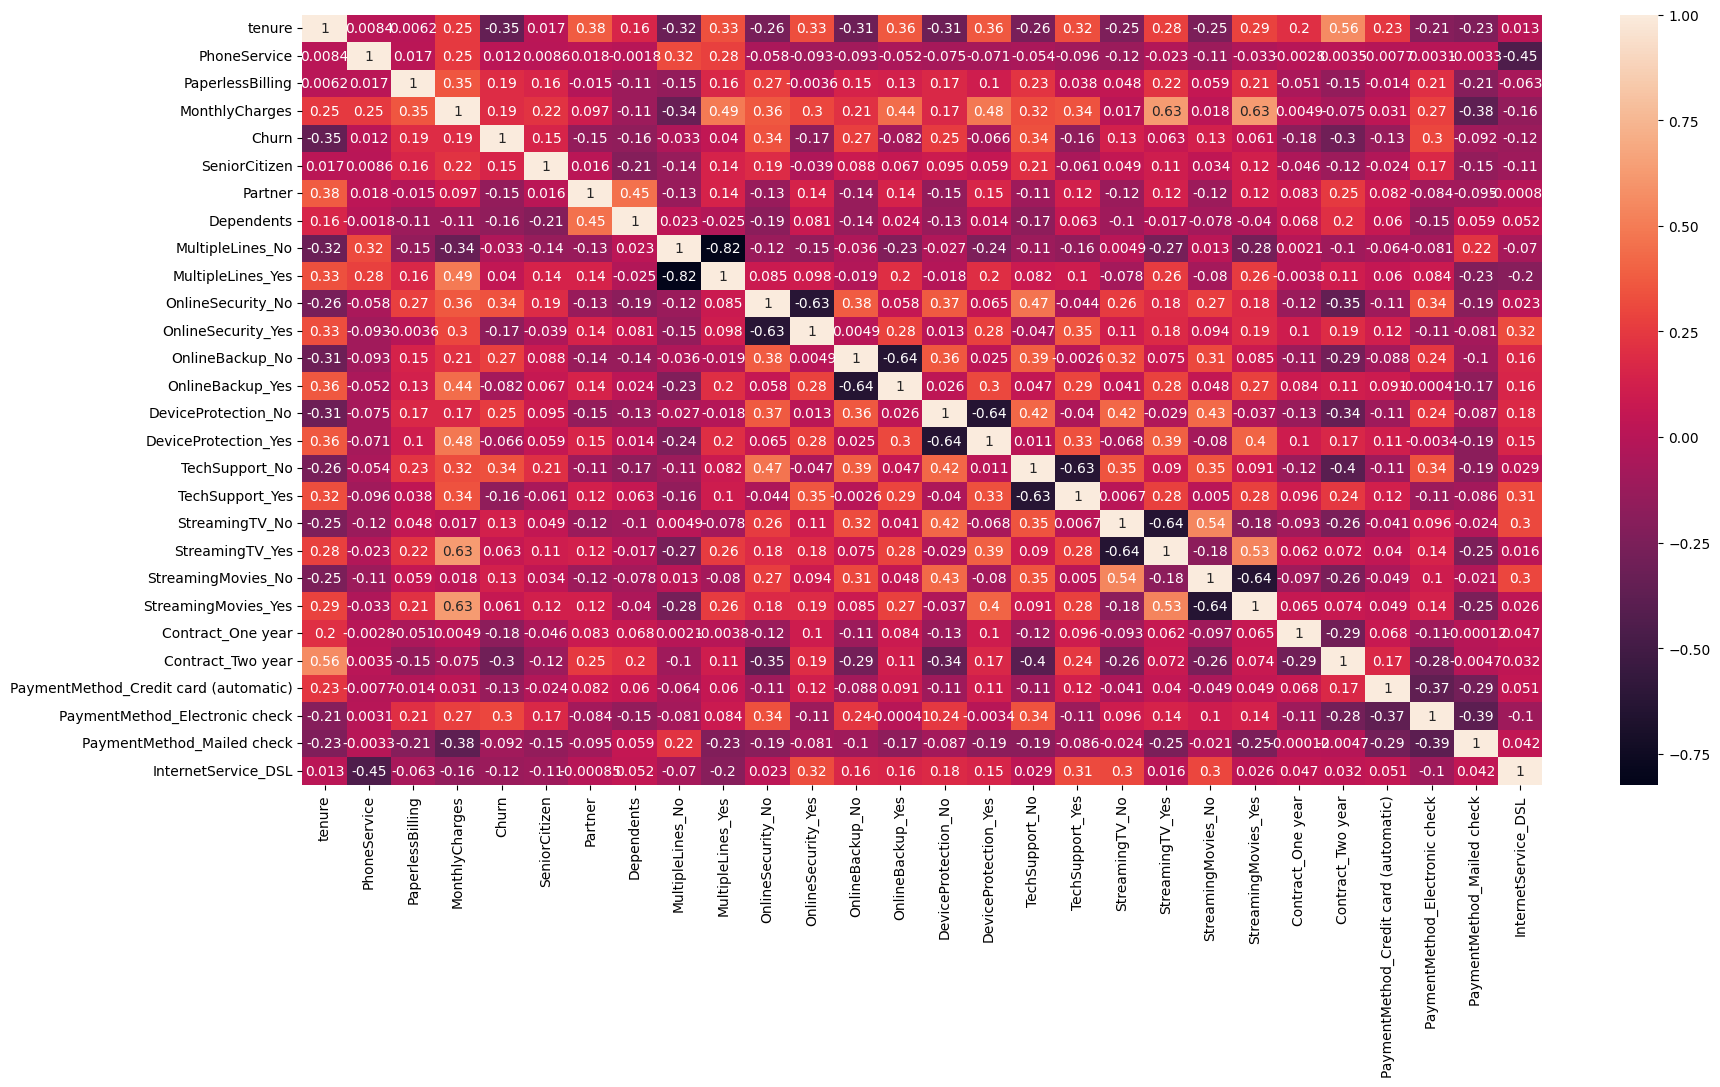

In [60]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [61]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                      'StreamingTV_No','StreamingMovies_No'], axis = 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                        'StreamingTV_No','StreamingMovies_No'], axis = 1)

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [62]:
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.9
Date:                Fri, 21 Jun 2024   Deviance:                       4055.7
Time:                        08:29:45   Pearson chi2:                 5.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2842
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0565      0.237      0.239      0.811      -0.407       0.520
tenure                                   -0.8571      0.070    -12.205      0.000      -0.995      -0.719
PhoneService                             -1.2436      0.165     -7.530      0.000      -1.567      -0.920
PaperlessBilling                          0.3301      0.090      3.669      0.000       0.154       0.506
MonthlyCharges                            0.9636      0.096     10.037      0.000       0.775       1.152
SeniorCitizen                             0.2444      0.103      2.372      0.018       0.042       0.446
Partner                                   0.0100      0.093      0.108      0.914      -0.172       0.192
Dependents                               -0.2079      0.107     -1.944      0.052      -0.418       0.002
MultipleLines_Yes                         0.0943      0.099      0.954      0.340      -0.099       0.288
OnlineSecurity_Yes                       -0.5985      0.105     -5.697      0.000      -0.804      -0.393
OnlineBackup_Yes                         -0.2213      0.095     -2.320      0.020      -0.408      -0.034
DeviceProtection_Yes                     -0.1072      0.099     -1.087      0.277      -0.301       0.086
TechSupport_Yes                          -0.5531      0.107     -5.167      0.000      -0.763      -0.343
StreamingTV_Yes                          -0.0576      0.106     -0.546      0.585      -0.265       0.149
StreamingMovies_Yes                       0.0417      0.104      0.399      0.690      -0.163       0.246
Contract_One year                        -0.5508      0.126     -4.383      0.000      -0.797      -0.304
Contract_Two year                        -1.5318      0.221     -6.926      0.000      -1.965      -1.098
PaymentMethod_Credit card (automatic)     0.0007      0.138      0.005      0.996      -0.269       0.270
PaymentMethod_Electronic check            0.4048      0.112      3.608      0.000       0.185       0.625
PaymentMethod_Mailed check                0.1023      0.136      0.752      0.452      -0.164       0.369
InternetService_DSL                      -0.1579      0.113     -1.403      0.161      -0.379       0.063
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= logreg, n_features_to_select=15)            # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True])

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 3),
 ('StreamingMovies_Yes', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 6),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 2),
 ('InternetService_DSL', True, 1)]

In [68]:
col = X_train.columns[rfe.support_]

In [69]:
X_train.columns[~rfe.support_]

Index(['Partner', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

##### Assessing the model with StatsModels

In [70]:
X_train_sm = X_train[col]
logreg = LogisticRegression()

logreg.fit(X_train_sm , y_train)

LogisticRegression()

In [71]:
# Getting the predicted values on the train set
y_train_pred = logreg.predict(X_train_sm)
y_train_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [72]:
from sklearn import metrics

In [73]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred, y_train )
print(confusion)

[[3265  591]
 [ 357  717]]


In [74]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred, y_train))

0.8077079107505071


#### Checking VIFs

In [76]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif          #remove InternetService_Fiber optic rebuild the model

,Features,VIF
1,PhoneService,5.47
12,Contract_Two year,3.18
3,MonthlyCharges,2.69
2,PaperlessBilling,2.64
6,MultipleLines_Yes,2.57
14,InternetService_DSL,2.48
0,tenure,2.40
9,DeviceProtection_Yes,2.25
10,TechSupport_Yes,2.19
8,OnlineBackup_Yes,2.15


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [78]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6675977653631285

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.8467323651452282

## Precision and Recall

In [81]:
confusion = metrics.confusion_matrix(y_train_pred, y_train )
confusion

array([[3265,  591],
       [ 357,  717]])

##### Precision
TP / TP + FP

In [82]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5481651376146789

##### Recall
TP / TP + FN

In [83]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6675977653631285

Using sklearn utilities for the same

In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
precision_score(y_train_pred, y_train)

0.5481651376146789

In [86]:
recall_score(y_train_pred, y_train)

0.6675977653631285

###Making predictions on the test set

In [87]:
X_test[['tenure','MonthlyCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges']])

In [88]:
X_test = X_test[col]
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Dependents,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_DSL
6099,1.577361,1,0,-1.322570,0,1,1,0,0,0,0,0,1,0,0
5495,-0.867929,1,1,0.314172,0,0,0,0,0,0,1,0,0,1,0
6702,-0.582645,1,1,0.705459,0,1,0,0,0,0,1,0,0,1,0
1866,1.292077,1,1,1.331517,0,1,1,1,0,0,1,1,0,0,0
5728,-0.786419,1,0,0.832002,0,0,1,0,1,1,1,0,0,1,0


Making predictions on the test set

In [89]:
y_test_pred = logreg.predict(X_test)

In [90]:
y_test_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred, y_test)

0.7950780880265026

In [92]:
confusion2 = metrics.confusion_matrix(y_test_pred, y_test )
confusion2

array([[1371,  252],
       [ 181,  309]])

In [93]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6306122448979592

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.844731977818854

In [96]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



## Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [98]:
tree = DecisionTreeClassifier()
tree.fit(X_train_sm, y_train)

DecisionTreeClassifier()

In [99]:
y_train_pred = tree.predict(X_train_sm)
y_test_pred = tree.predict(X_test)

In [100]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9961460446247464


array([[3621,    1],
       [  18, 1290]])

In [101]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)  #do hyper tuneing and check again

0.7198296261239944


array([[1242,  310],
       [ 282,  279]])

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
params = {
    'max_depth': [2,3,4,5,10,20],
    'min_samples_leaf':[5 , 10, 20,50, 100],
    'criterion': ['gini' , 'entropy']
}

In [104]:
grid_search = GridSearchCV(estimator= tree , param_grid= params , cv = 4 ,
                           n_jobs = -1 , verbose = 1 , scoring = "accuracy")

In [105]:
grid_search.fit(X_train_sm , y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [106]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020377,0.006618,0.008462,0.004289,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786699,0.772912,0.734578,0.777597,0.767947,0.019893,45
1,0.015695,0.003965,0.006726,0.002792,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786699,0.772912,0.734578,0.777597,0.767947,0.019893,45
2,0.016038,0.006867,0.006178,0.002511,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786699,0.772912,0.734578,0.777597,0.767947,0.019893,45
3,0.023833,0.006317,0.008360,0.002960,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786699,0.772912,0.734578,0.777597,0.767947,0.019893,45
4,0.022376,0.005551,0.009363,0.000961,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786699,0.772912,0.734578,0.777597,0.767947,0.019893,45


In [107]:
cv_df.shape

(60, 15)

In [108]:
cv_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
53,0.015560,0.000245,0.005127,0.001765,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.801298,0.776967,0.803571,0.789773,0.792902,0.010584,1
58,0.016219,0.000214,0.004063,0.000134,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.801298,0.776967,0.803571,0.789773,0.792902,0.010584,1
23,0.025550,0.001966,0.015272,0.003264,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.802920,0.786699,0.803571,0.778409,0.792900,0.010755,3
28,0.032138,0.002521,0.009257,0.003321,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.802920,0.786699,0.803571,0.778409,0.792900,0.010755,3
18,0.028220,0.002686,0.007094,0.003074,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.795620,0.786699,0.801136,0.785714,0.792293,0.006400,5


In [109]:
grid_search.best_score_

0.7929021379067

In [110]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50)

In [111]:
tree2 = grid_search.best_estimator_
tree2.fit(X_train_sm, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50)

In [112]:
y_train_pred = tree2.predict(X_train_sm)
y_test_pred = tree2.predict(X_test)

In [113]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8107505070993914


array([[3352,  270],
       [ 663,  645]])

In [114]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7775674396592522


array([[1392,  160],
       [ 310,  251]])

In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.61      0.45      0.52       561

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113



## SVM

In [116]:
from sklearn import svm



In [117]:
sv = svm.SVC(kernel='linear' , gamma = 'auto' , C = 2)
sv.fit(X_train_sm, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [118]:
y_train_pred = sv.predict(X_train_sm)
y_test_pred = sv.predict(X_test)

In [119]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8087221095334686


array([[3266,  356],
       [ 587,  721]])

In [120]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.792238523426408


array([[1366,  186],
       [ 253,  308]])

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.62      0.55      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



# Random Forest


In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
forest = RandomForestClassifier(random_state= 42 , max_depth = 3 , n_estimators = 10 , oob_score= True)

In [124]:
forest.fit(X_train_sm , y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [125]:
forest.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [126]:
# OOB Score
# Average value of out of bag score for different tree
#the OOB score is calculated using out-of-bag samples and is a measure of the model’s performance on unseen data.
forest.oob_score_

0.7760649087221095

In [127]:
forest = RandomForestClassifier(random_state = 42 , n_jobs= 1)

In [128]:
params = {
    'max_depth': [2,3,4,5,10,20],
    'min_samples_leaf':[5 , 10, 20,50, 100],
    'max_features':[5,10,15],
    'n_estimators':[10,30,50,100]
    }

In [129]:
grid_search = GridSearchCV(estimator = forest , param_grid = params , cv = 4 ,
                           n_jobs = -1 , verbose = 1 , scoring = "accuracy")

In [130]:
grid_search.fit(X_train_sm , y_train)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [131]:
forest_df = pd.DataFrame(grid_search.cv_results_)
forest_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044749,0.002819,0.007357,0.001560,2,5,5,10,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.734793,0.762368,0.777597,0.780844,0.763901,0.018195,352
1,0.159735,0.033611,0.014492,0.003162,2,5,5,30,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.758313,0.762368,0.762987,0.779221,0.765722,0.007997,343
2,0.186884,0.005010,0.014129,0.000533,2,5,5,50,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.762368,0.763990,0.763799,0.769481,0.764909,0.002713,347
3,0.374947,0.007448,0.031328,0.008485,2,5,5,100,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.759935,0.763179,0.762987,0.766234,0.763084,0.002228,355
4,0.067362,0.018686,0.009511,0.003734,2,5,10,10,"{'max_depth': 2, 'max_features': 5, 'min_sampl...",0.734793,0.762368,0.777597,0.780844,0.763901,0.018195,352


In [132]:
forest_df.shape

(360, 16)

In [133]:
forest_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
250,0.459917,0.036597,0.036315,0.005754,10,5,20,50,"{'max_depth': 10, 'max_features': 5, 'min_samp...",0.803731,0.791565,0.814123,0.801948,0.802842,0.008000,1
202,0.328104,0.008555,0.017684,0.001905,5,10,5,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.799676,0.792376,0.815747,0.801948,0.802437,0.008459,2
207,0.651120,0.008394,0.027915,0.001333,5,10,10,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.801298,0.791565,0.815747,0.801136,0.802437,0.008636,3
309,0.163449,0.001192,0.012290,0.000257,20,5,20,30,"{'max_depth': 20, 'max_features': 5, 'min_samp...",0.795620,0.794809,0.815747,0.801136,0.801828,0.008396,4
310,0.282668,0.009078,0.017461,0.000442,20,5,20,50,"{'max_depth': 20, 'max_features': 5, 'min_samp...",0.799676,0.793187,0.813312,0.801136,0.801828,0.007274,5


In [134]:
grid_search.best_score_

0.8028418636310972

In [135]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       n_estimators=50, n_jobs=1, random_state=42)

In [136]:
forest2 = grid_search.best_estimator_
forest2.fit(X_train_sm, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       n_estimators=50, n_jobs=1, random_state=42)

In [137]:
y_train_pred = forest2.predict(X_train_sm)
y_test_pred = forest2.predict(X_test)

In [138]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8223123732251522


array([[3368,  254],
       [ 622,  686]])

In [139]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7936583057264552


array([[1399,  153],
       [ 283,  278]])

In [140]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

